In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# k-Nearest Neighbors

In this lab, we will explore the k-nearest neighbors algorithm. Recall that $k$ is the hyperparameter of the model, controlling the bias-variance tradeoff. Let's see this in action.

## Generate sample data for the classifier

We will consider the context of using the k-nearest neighbor algorithm as a classifier. Towards this end, let us create a simple two-class dataset.

In [2]:
## Generate a dataset
x, y = np.random.random(1000), np.random.random(1000)
z = y + np.random.normal(0,0.25,len(x))
data = pd.DataFrame(data={'x': x, 'y':y, 'z':z})


In [3]:
def create_label(row): 
    return 0 if row['x'] > row['z'] else 1
data['t'] = data.apply(lambda row: create_label(row), axis=1)


## Some plots of the data.

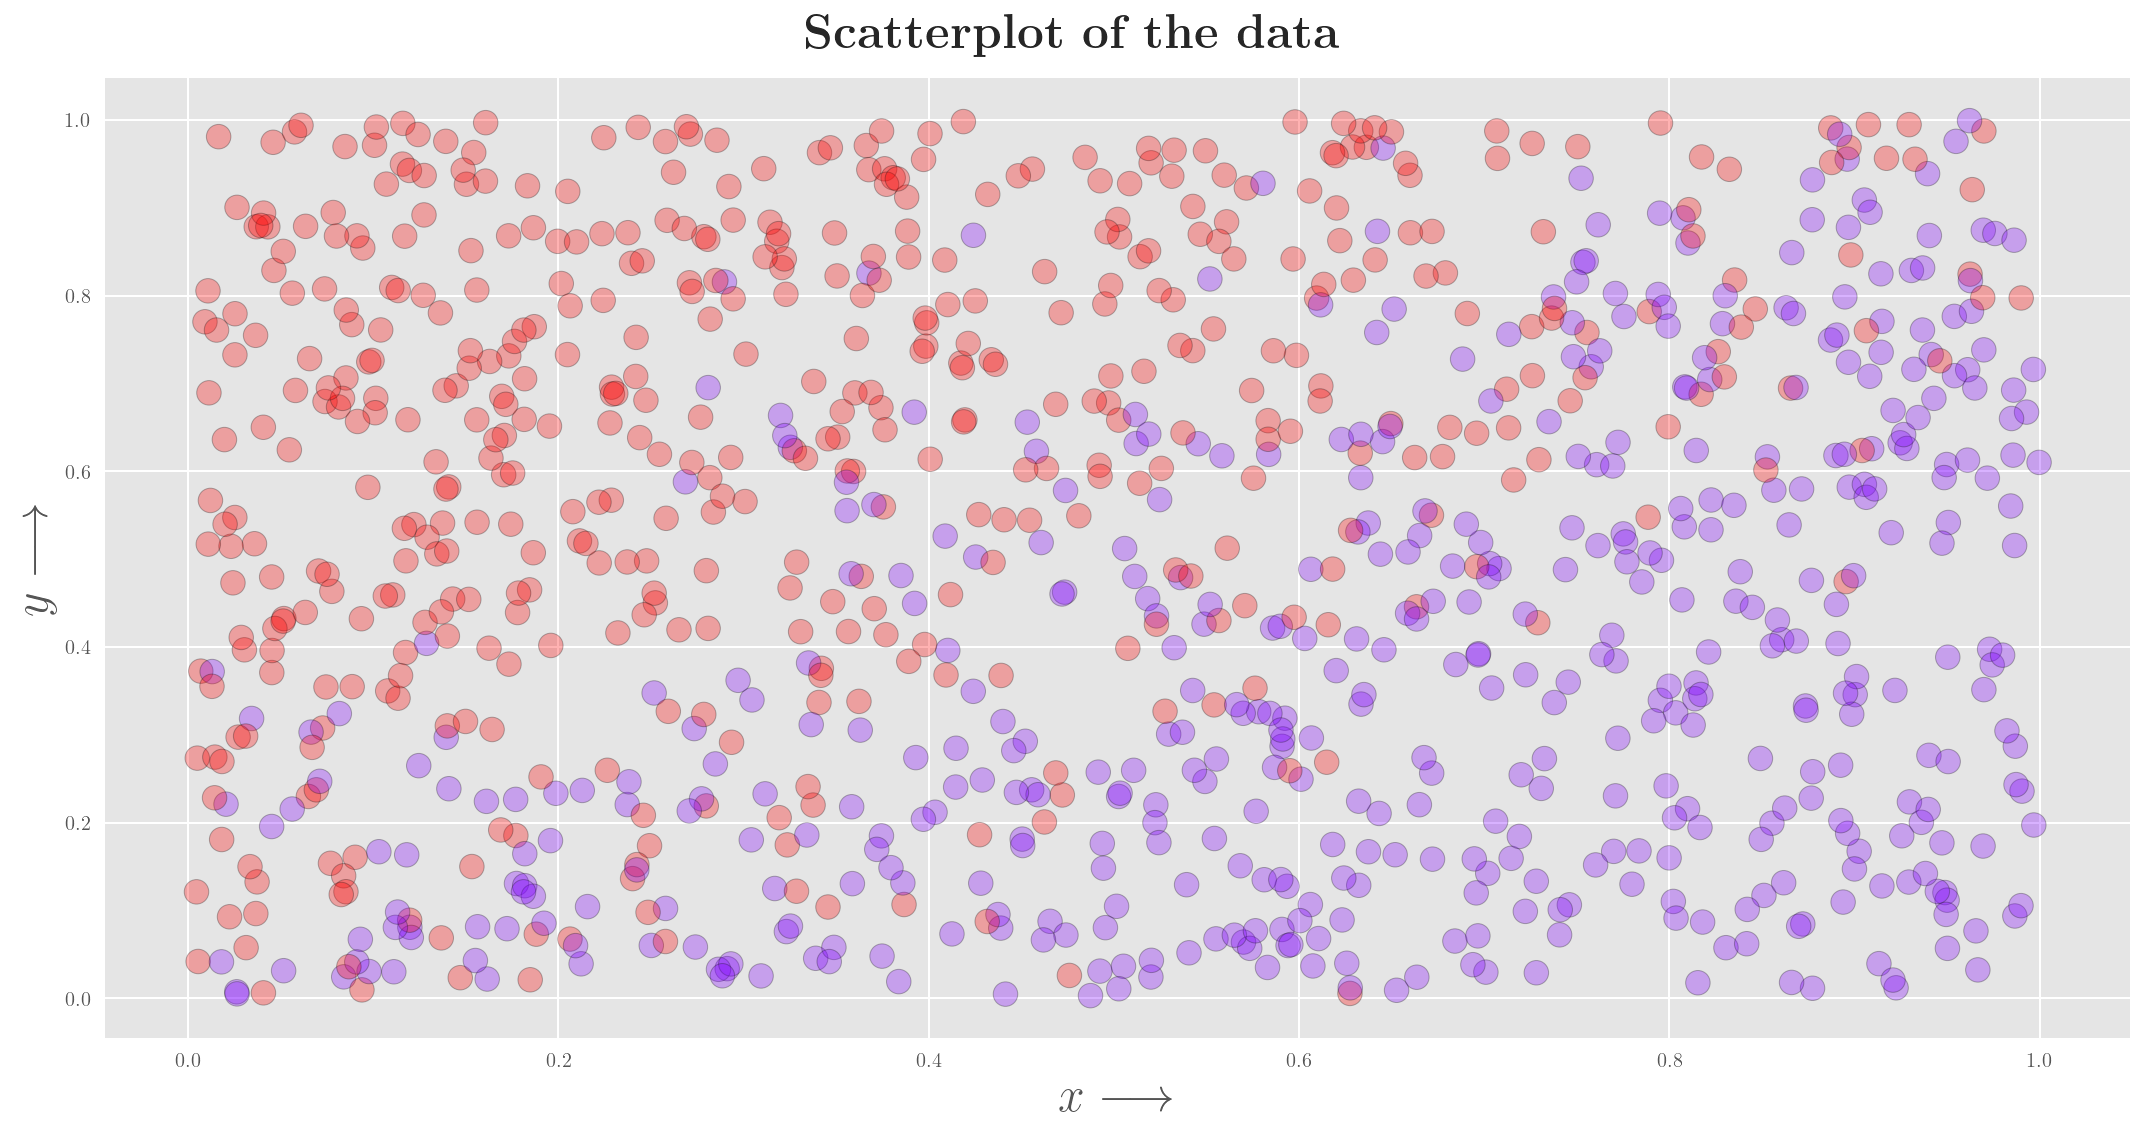

In [4]:
plt.figure(figsize=(15, 8));
plt.scatter(data.x, data.y, c=data.t,  cmap = 'rainbow', alpha=0.3, s=150, edgecolor='k')
plt.suptitle(r'\textbf{Scatterplot of the data}', size=24)
plt.xlabel(r'$x\longrightarrow$', size=24)
plt.ylabel(r'$y\longrightarrow$', size=24)
plt.tight_layout()

### Scatterplots and kernel density estimators

Let us plot out the one and two dimensional kernel density estimators.

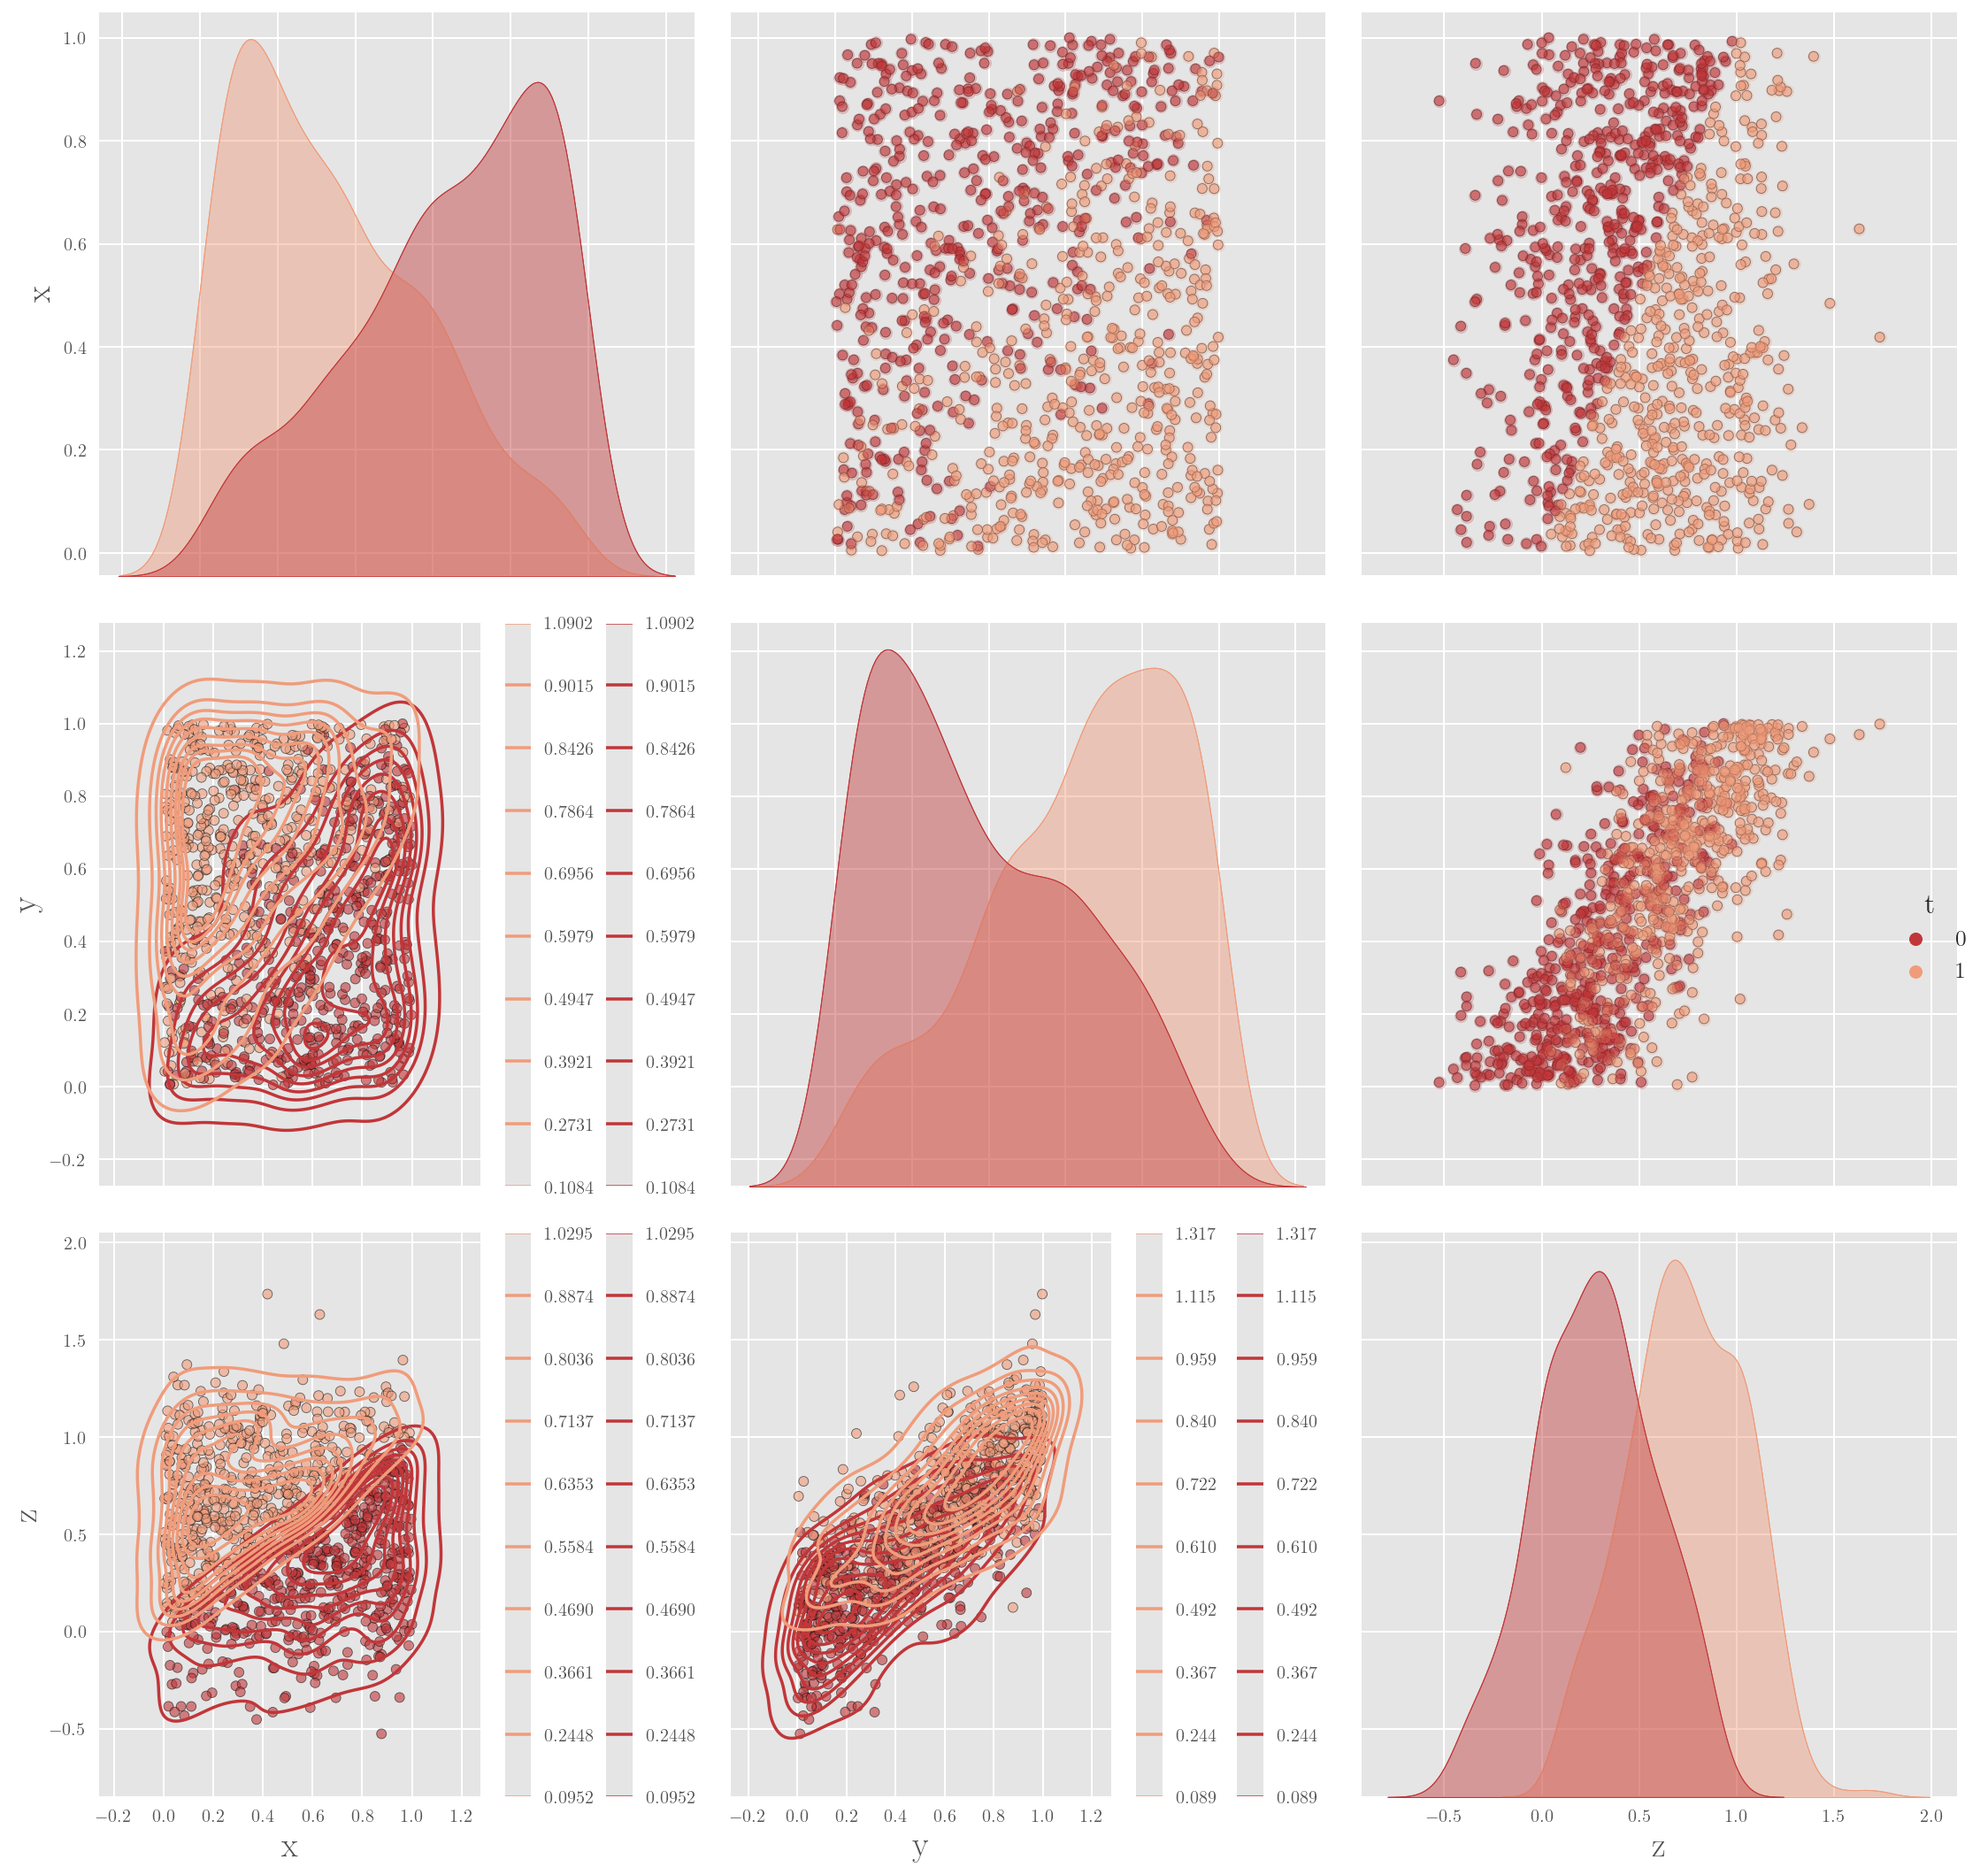

In [5]:
sns.set_palette("RdBu")

sample = data
g = sns.pairplot(sample, diag_kind='kde', 
                   plot_kws = { 'alpha': 0.60, 's': 30, 'edgecolor': 'k',  }, 
                   size=5, hue='t');
g.map_diag(sns.kdeplot,shade=True);
g.map_upper(plt.scatter,   alpha=0.2);
g.map_lower(sns.kdeplot, shade=False, shade_lowest=False, cbar=True);

plt.tight_layout()

## A simple nearest neighbor classifier

Let us consider the simplest neighbor classifier, where we classify a test point into the class of its nearest neighbor in the training set.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
X, y= data[['x', 'y']], data.t
clf.fit(X, y)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

### A very complicated decision boundary!

When we plot this below, we notice that the decision boundary seems extraordinarily complex. Clearly, our model is overfitting the data.

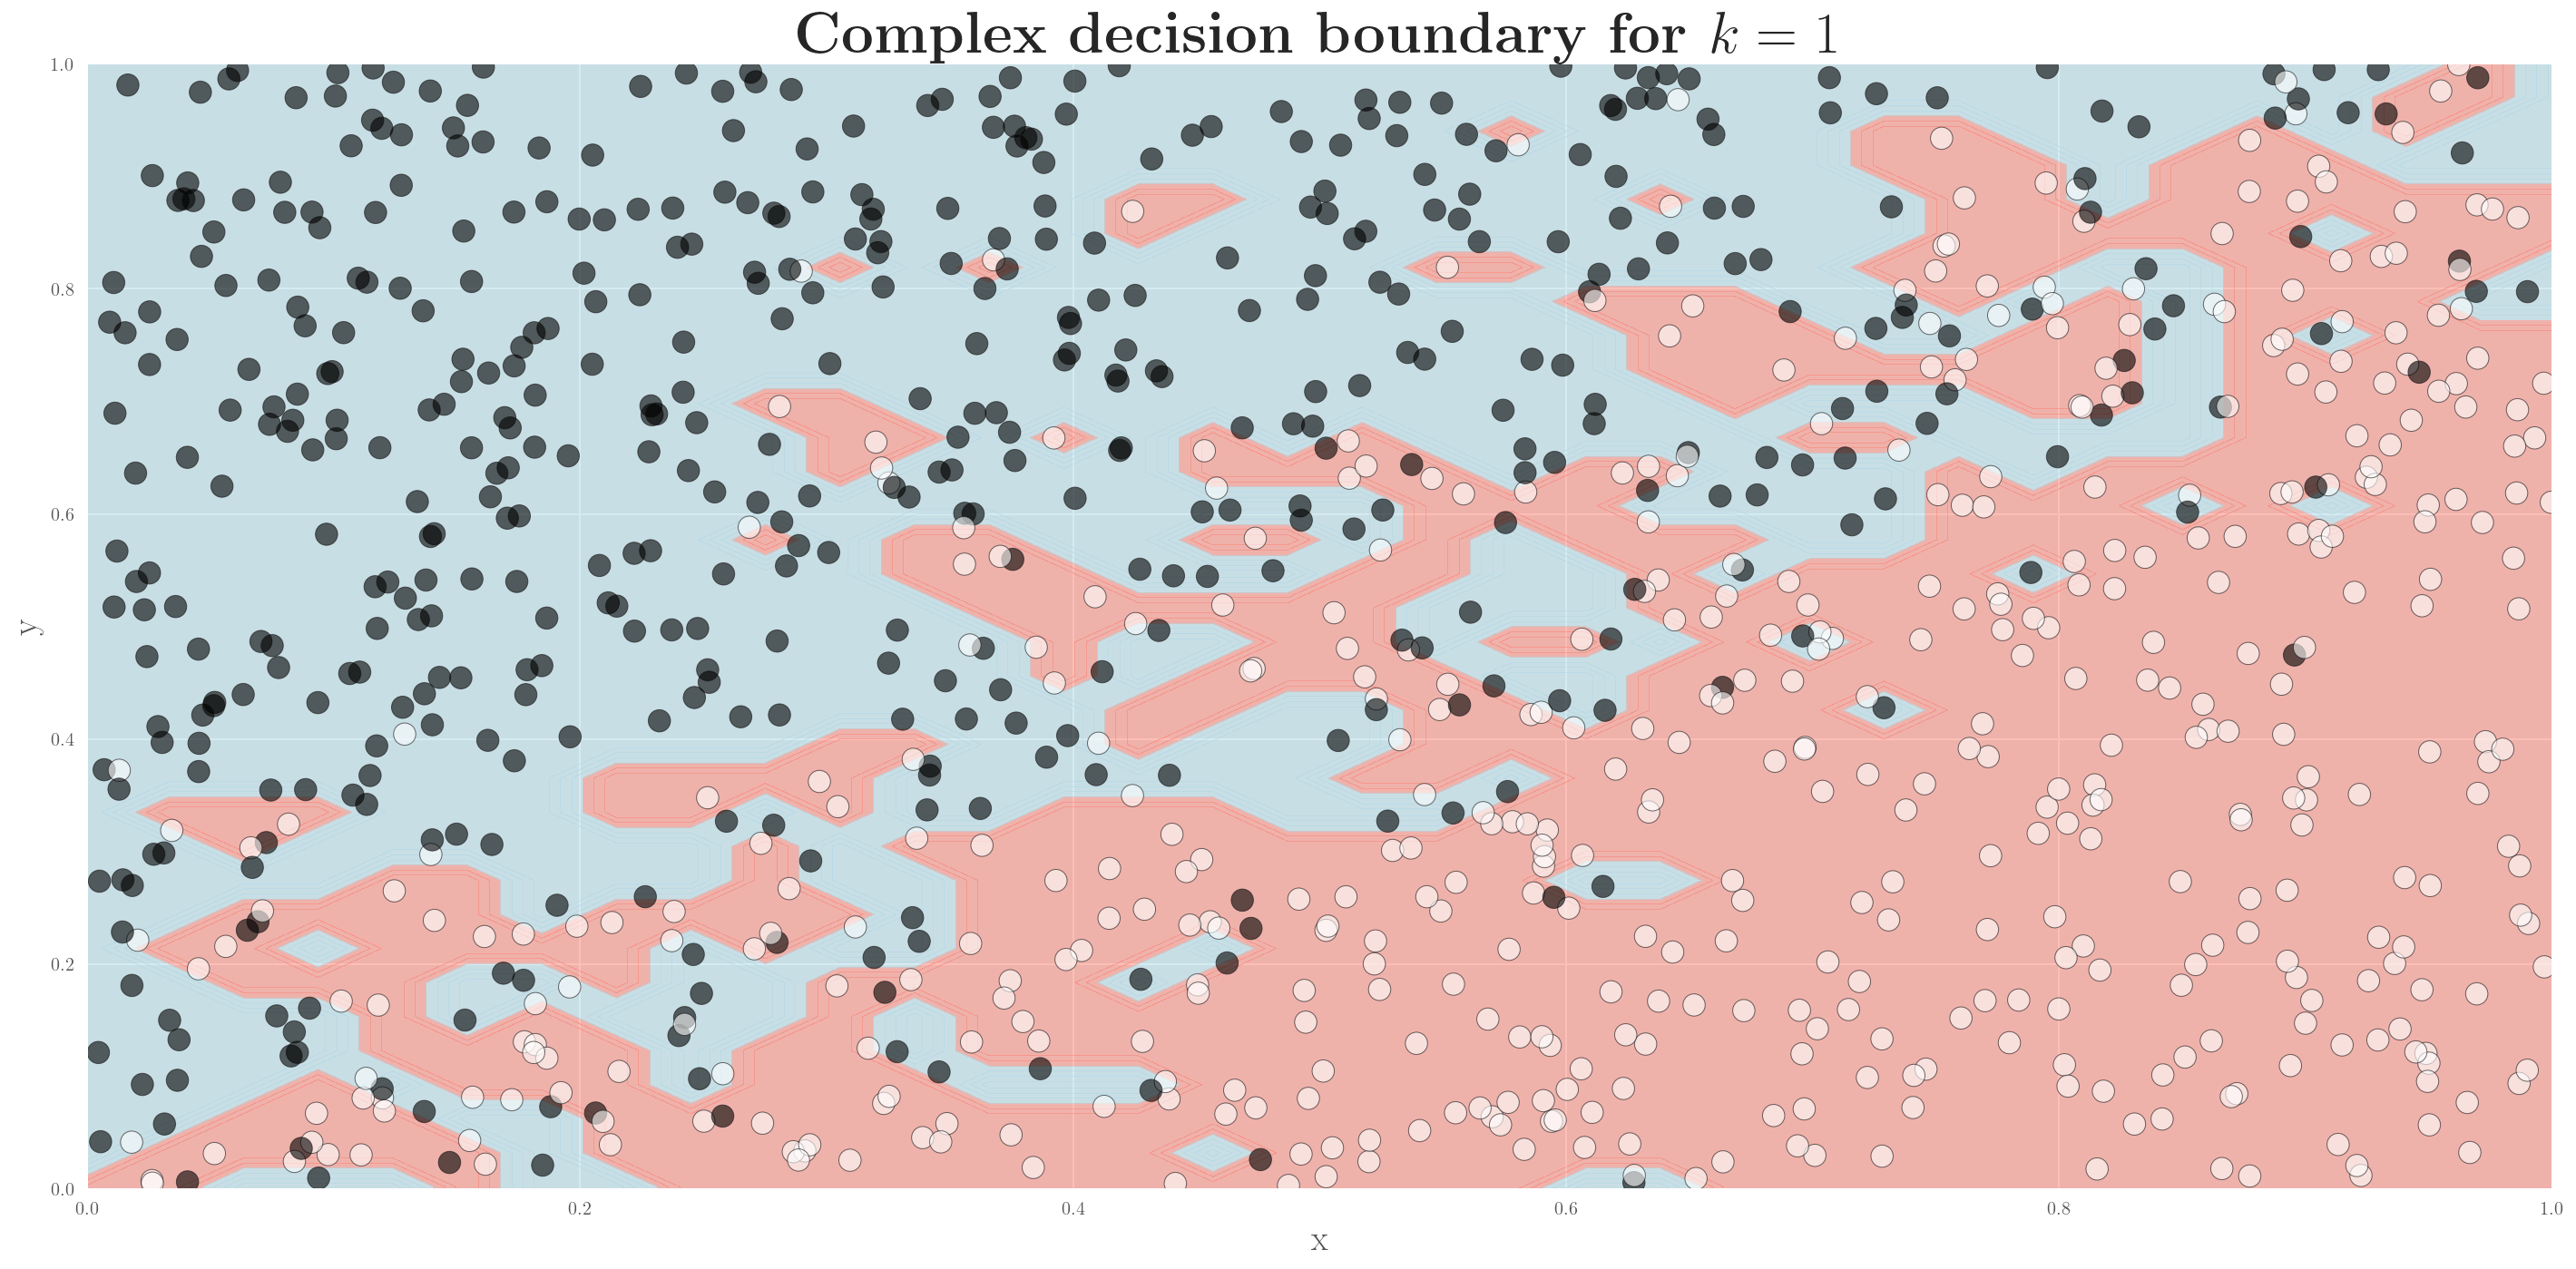

In [7]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
cmap_colors = ListedColormap(['salmon', 'lightblue'])
disp = DecisionBoundaryDisplay.from_estimator(clf, 
                                              X, 
                                              response_method='predict', 
                                              plot_method='contourf', 
                                              shading='auto',
                                              xlabel = 'x', 
                                              ylabel='y',
                                              cmap=cmap_colors,
                                              alpha=0.5
                                             )

plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(data.x, data.y, c=data.t,   alpha=0.6, s=150, edgecolor='k')
plt.title(r'\textbf{Complex decision boundary for $k=1$}', size=32)
plt.tight_layout()

## Hyperparameter tuning

Since $k$, the number of nearest-neighbors, is one of the hyperparameters of the model, let us consider how the decision boundary changes with different values of $k$. At the same time, let's observe how the model metrics vary. In order to achieve this, let us first split the data into the customary test and train subsets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Now, let us build a series of classifiers for different values of the hyperparameter $k$.

**Important: Observe that we have NOT kernelized the k-NN with a reciprocal distance kernel. What would happen if we did kernalize? This is left as an exercise for the reader.**

In [9]:
from sklearn.metrics import accuracy_score
k_value = []
accuracy = []
model = []
for k in range(1,105,5):
    clf = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree', weights='uniform')
    clf.fit(X_train, y_train)
    ŷ = clf.predict(X_test)
    acc = accuracy_score(y_test, ŷ)
    k_value.append(k)
    accuracy.append(acc)
    model.append(clf)

### Plot of accuravy vs the hyperparameter $k$

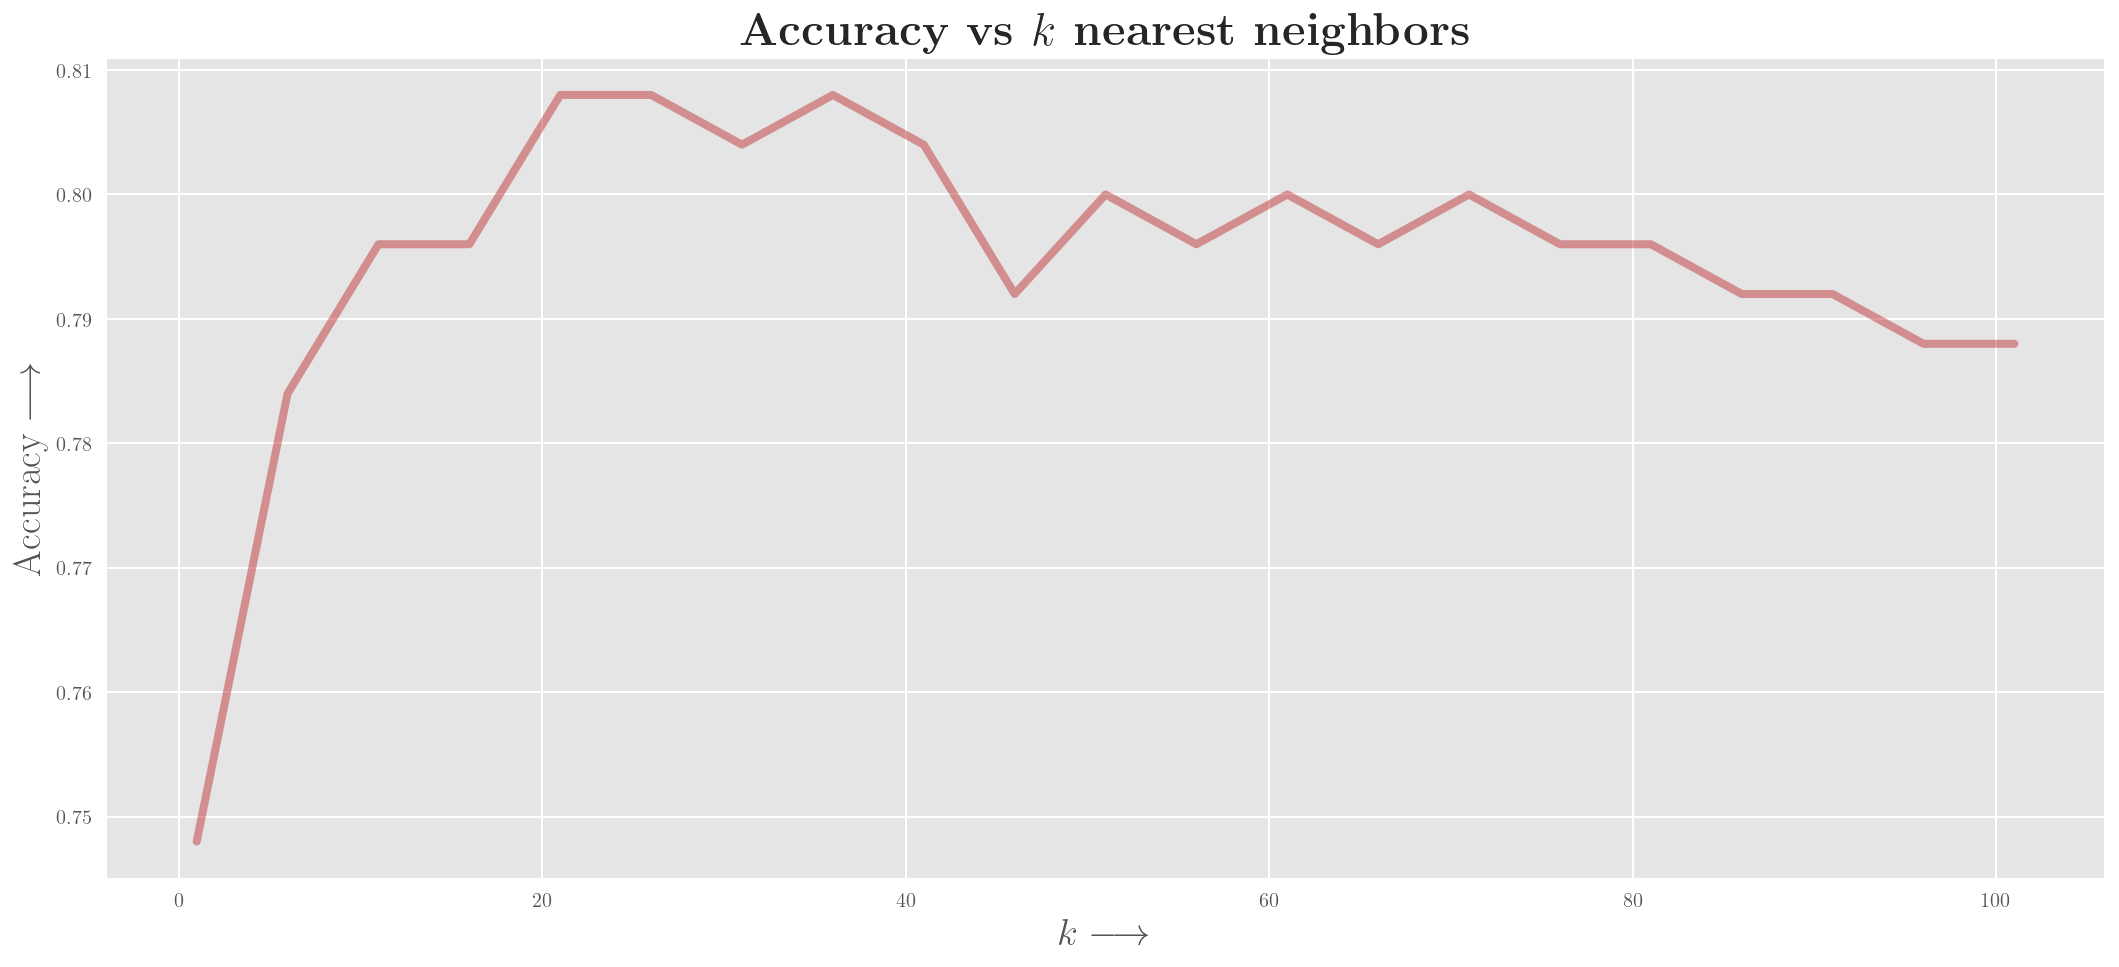

In [10]:
plt.figure(figsize=(15, 7));
plt.plot(k_value, accuracy, linewidth=4, alpha=0.5)
plt.xlabel(r'$k\longrightarrow$')
plt.ylabel(r'Accuracy $\longrightarrow$')
plt.title(r'\textbf{Accuracy vs $k$ nearest neighbors}')
plt.tight_layout()

In [11]:
metrics_data = pd.DataFrame(data={'k': k_value, 'accuracy': accuracy})
metrics_data.head(25)

k  accuracy
0     1     0.748
1     6     0.784
2    11     0.796
3    16     0.796
4    21     0.808
5    26     0.808
6    31     0.804
7    36     0.808
8    41     0.804
9    46     0.792
10   51     0.800
11   56     0.796
12   61     0.800
13   66     0.796
14   71     0.800
15   76     0.796
16   81     0.796
17   86     0.792
18   91     0.792
19   96     0.788
20  101     0.788

## Decision boundary vs $k$

Let us observe how the shape of he decision boundary changes for different values of $k$.

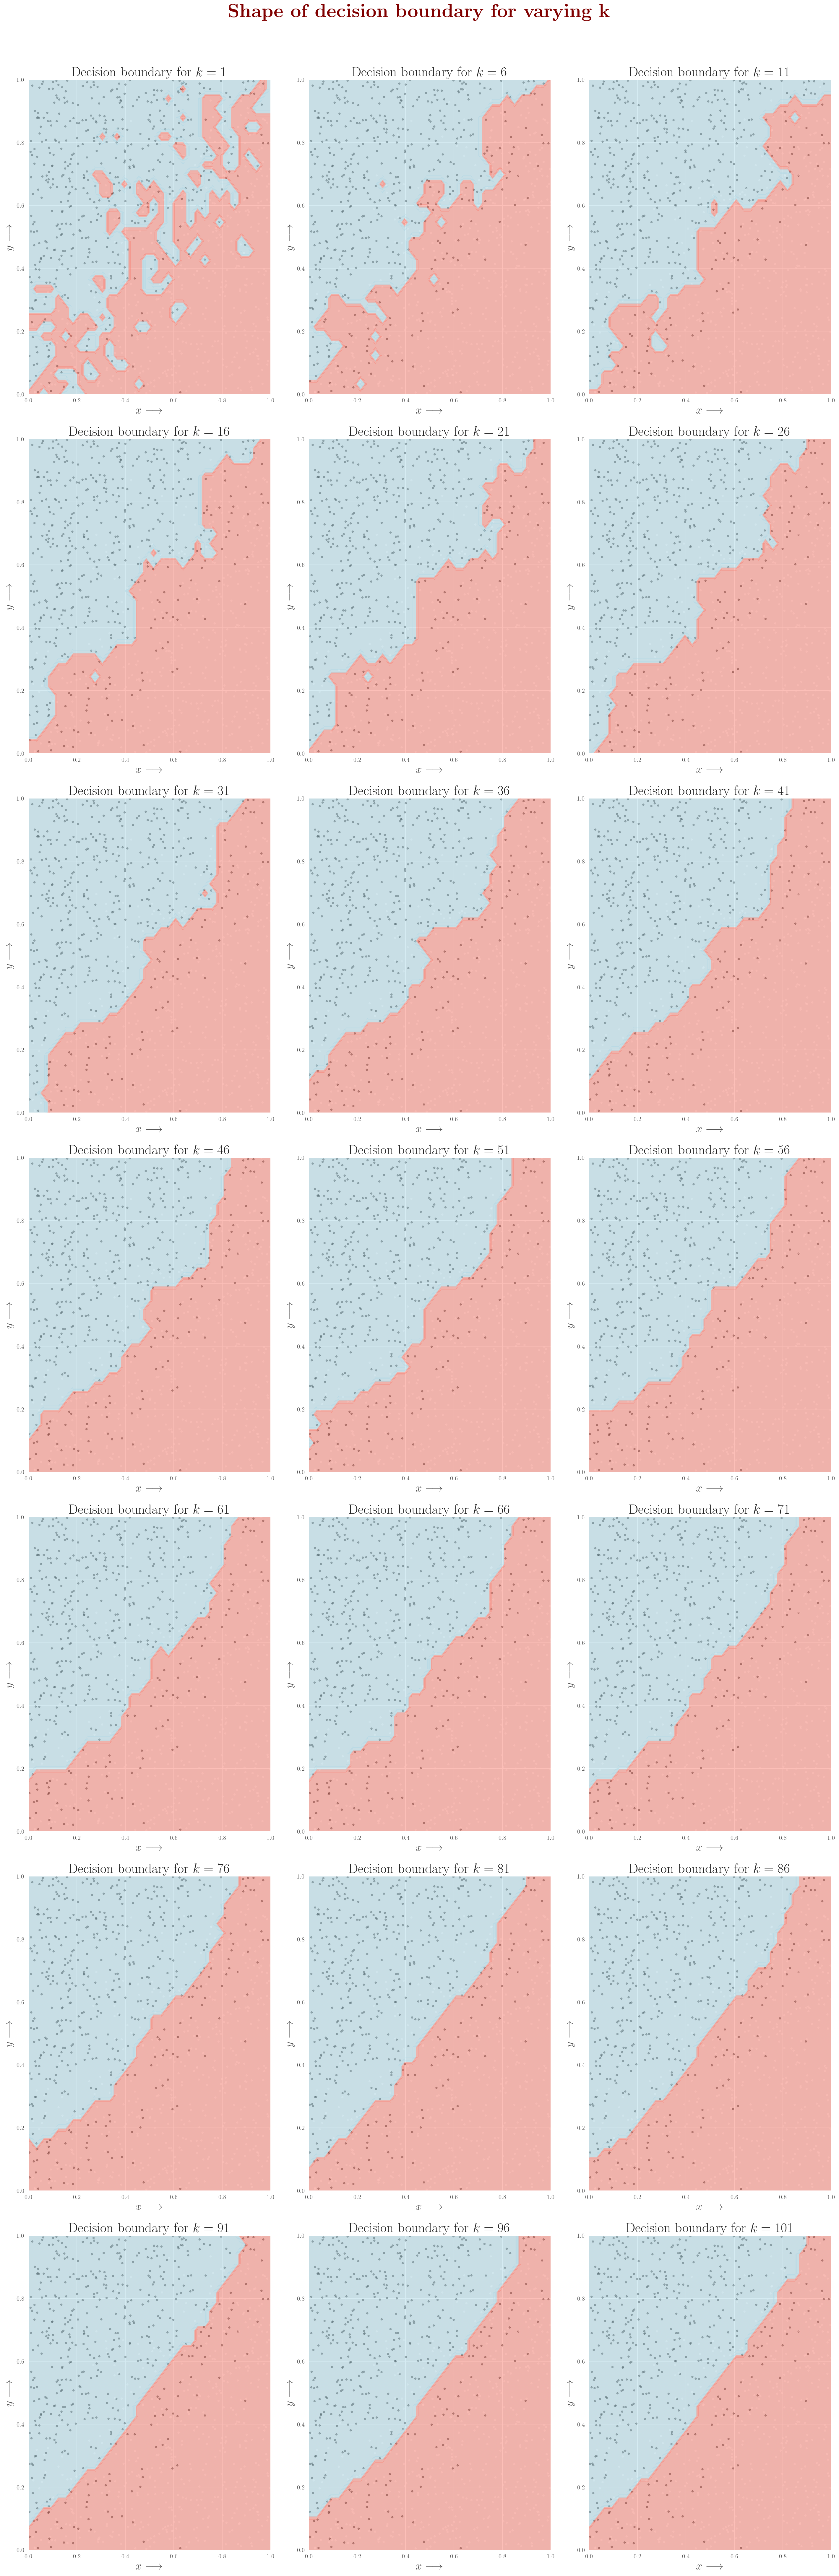

In [12]:
#plt.figure(figsize=(200, 1000));

fig = plt.figure(figsize=(20, 60))
fig.suptitle(r'\textbf{Shape of decision boundary for varying k}', y=1.01, size=32, color='maroon')
plt.subplots_adjust(hspace=0.4,  # vertical spacing between subplots
                    wspace=.3)   # horizontal spacing between subplots
#
# Loop through the models
for i in range (len(model)):
    ax = fig.add_subplot(7,3,i+1)
    k  = k_value[i]
    ax.set_title(rf'Decision boundary for $k={k}$')
    ax.set_xlabel(r'$x\longrightarrow$')
    ax.set_ylabel(r'$y\longrightarrow$')
    ax.scatter (data.x, data.y, s=10, alpha=0.5, c=data.t)
    
    disp = DecisionBoundaryDisplay.from_estimator(model[i], 
                                              X, 
                                              response_method='predict', 
                                              plot_method='contourf', 
                                              shading='auto',
                                              xlabel = 'x', 
                                              ylabel='y',
                                              cmap=cmap_colors,
                                              alpha=0.5,
                                              ax=ax
                                             )

    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    
    
    ax.margins = (10,10)

# Finally, show the whole plot    
plt.tight_layout()

## Exercise

What would happen if we changed the weights argument in the `KNeighborsClassifier()` to `weights='distance'`? This kernelizes the algorithm.

Redo the whole notebook with the change. Can you explain why this happens?